In [1]:
import pandas as pd

# Carga el CSV
df = pd.read_csv("BTCUSDT_1d_full.csv")

# Muestra las primeras filas
print(df.head())


       Open Time     Open     High      Low    Close       Volume  \
0  1502928000000  4261.48  4485.39  4200.74  4285.08   795.150377   
1  1503014400000  4285.08  4371.52  3938.77  4108.37  1199.888264   
2  1503100800000  4108.37  4184.69  3850.00  4139.98   381.309763   
3  1503187200000  4120.98  4211.08  4032.62  4086.29   467.083022   
4  1503273600000  4069.13  4119.62  3911.79  4016.00   691.743060   

      Close Time  Quote Asset Volume  Number of Trades  \
0  1503014399999        3.454770e+06              3427   
1  1503100799999        5.086958e+06              5233   
2  1503187199999        1.549484e+06              2153   
3  1503273599999        1.930364e+06              2321   
4  1503359999999        2.797232e+06              3972   

   Taker Buy Base Asset Volume  Taker Buy Quote Asset Volume        Ignore  
0                   616.248541                  2.678216e+06   8733.911395  
1                   972.868710                  4.129123e+06   9384.141409  
2    

In [4]:
import pandas as pd
import pandas as pd

pd.to_datetime(1502928000000, unit='ms')



Timestamp('2017-08-17 00:00:00')

In [5]:
# Mantener solo timestamps entre 2010 y 2035
df = df[(df['open_time'] > 1262304000000) & (df['open_time'] < 2051222400000)]

# Convertir a datetime
df["open_time"] = pd.to_datetime(df["open_time"], unit='ms', errors='coerce')
df["close_time"] = pd.to_datetime(df["close_time"], unit='ms', errors='coerce')

# Quitar filas inválidas
df = df.dropna(subset=["open_time", "close_time"]).reset_index(drop=True)

df.head()


,open_time,open,high,low,close,volume,close_time,quote_volume,num_trades,taker_base_volume,taker_quote_volume,ignore
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999,3.454770e+06,3427,616.248541,2.678216e+06,8733.911395
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999,5.086958e+06,5233,972.868710,4.129123e+06,9384.141409
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999,1.549484e+06,2153,274.336042,1.118002e+06,9184.085529
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-20 23:59:59.999,1.930364e+06,2321,376.795947,1.557401e+06,10125.414084
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-21 23:59:59.999,2.797232e+06,3972,557.356107,2.255663e+06,11706.769970


In [6]:
#Información general del dataset:

df.info()
df.describe()


#Comprobar valores nulos:

df.isnull().sum()


#Resumen básico:

print(f"Fechas: {df['open_time'].min()} -> {df['open_time'].max()}")
print(f"Número de registros: {len(df)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   open_time           2694 non-null   datetime64[ns]
 1   open                2694 non-null   float64       
 2   high                2694 non-null   float64       
 3   low                 2694 non-null   float64       
 4   close               2694 non-null   float64       
 5   volume              2694 non-null   float64       
 6   close_time          2694 non-null   datetime64[ns]
 7   quote_volume        2694 non-null   float64       
 8   num_trades          2694 non-null   int64         
 9   taker_base_volume   2694 non-null   float64       
 10  taker_quote_volume  2694 non-null   float64       
 11  ignore              2694 non-null   float64       
dtypes: datetime64[ns](2), float64(9), int64(1)
memory usage: 252.7 KB
Fechas: 2017-08-17 00:00:00 -> 2024-12

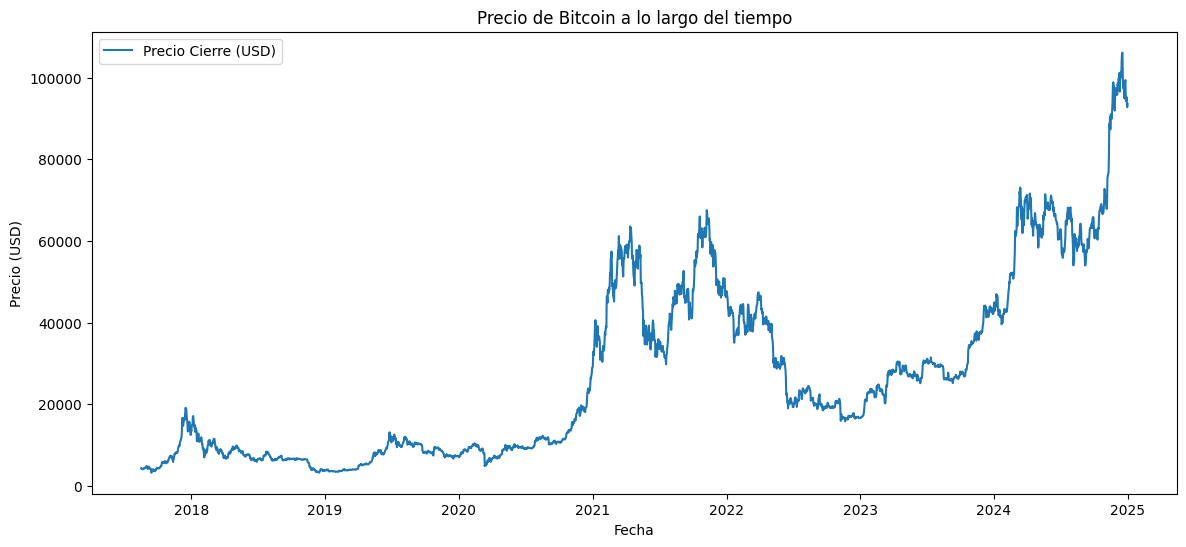

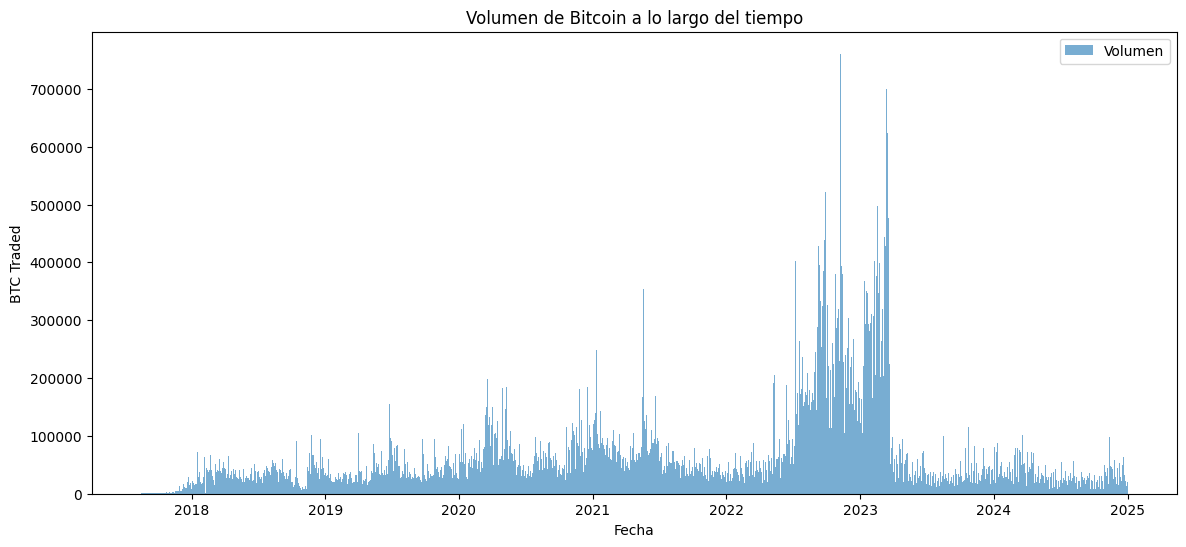

In [7]:
#Gráfico de precios:

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df["open_time"], df["close"], label="Precio Cierre (USD)")
plt.title("Precio de Bitcoin a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.show()


#Gráfico de volumen:

plt.figure(figsize=(14,6))
plt.bar(df["open_time"], df["volume"], width=1, label="Volumen", alpha=0.6)
plt.title("Volumen de Bitcoin a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("BTC Traded")
plt.legend()
plt.show()

In [8]:
import pandas as pd
import numpy as np

# === 1. Medias móviles ===
df["SMA_20"] = df["close"].rolling(window=20).mean()  # Media móvil simple de 20 días
df["SMA_50"] = df["close"].rolling(window=50).mean()  # Media móvil simple de 50 días
df["EMA_20"] = df["close"].ewm(span=20, adjust=False).mean()  # Media móvil exponencial de 20 días

# === 2. Retornos diarios ===
df["daily_return"] = df["close"].pct_change() * 100  # % de cambio diario

# === 3. Volatilidad histórica (rolling std) ===
df["volatility_20d"] = df["daily_return"].rolling(window=20).std()  # desviación estándar 20 días

# === 4. RSI (Relative Strength Index) ===
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=period).mean()
    avg_loss = pd.Series(loss).rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df["RSI_14"] = compute_rsi(df["close"], period=14)

# === 5. Tendencia simple (basada en cruce de medias móviles) ===
df["trend"] = np.where(df["SMA_20"] > df["SMA_50"], "Alcista", "Bajista")

# Mostrar últimas filas
print(df.tail(10))


      open_time      open      high       low     close       volume  \
2684 2024-12-22  97292.00  97448.08  94250.35  95186.27  19353.83036   
2685 2024-12-23  95186.28  96538.92  92520.00  94881.47  32810.76703   
2686 2024-12-24  94881.47  99487.99  93569.02  98663.58  23674.22488   
2687 2024-12-25  98663.58  99569.15  97632.02  99429.60  14474.16510   
2688 2024-12-26  99429.61  99963.70  95199.14  95791.60  21192.36727   
2689 2024-12-27  95791.60  97544.58  93500.01  94299.03  26501.26429   
2690 2024-12-28  94299.03  95733.99  94135.66  95300.00   8385.89290   
2691 2024-12-29  95300.00  95340.00  93009.52  93738.20  13576.00578   
2692 2024-12-30  93738.19  95024.50  91530.45  92792.05  27619.42250   
2693 2024-12-31  92792.05  96250.00  92033.73  93576.00  19612.03389   

                  close_time  quote_volume  num_trades  taker_base_volume  \
2684 2024-12-22 23:59:59.999  1.857820e+09     3633551         9293.39749   
2685 2024-12-23 23:59:59.999  3.100007e+09     546491

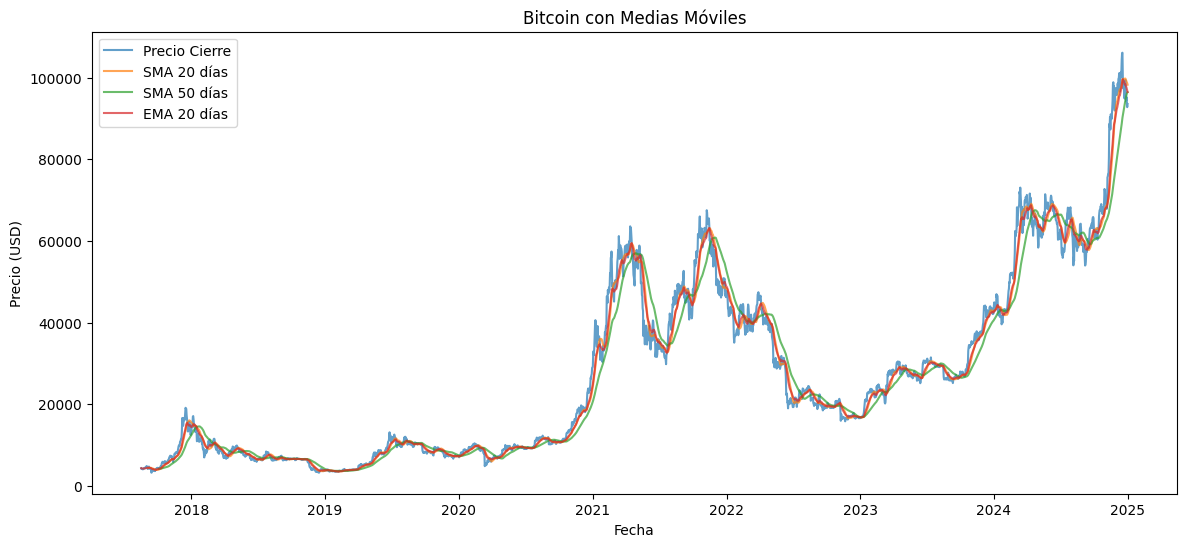

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df["open_time"], df["close"], label="Precio Cierre", alpha=0.7)
plt.plot(df["open_time"], df["SMA_20"], label="SMA 20 días", alpha=0.7)
plt.plot(df["open_time"], df["SMA_50"], label="SMA 50 días", alpha=0.7)
plt.plot(df["open_time"], df["EMA_20"], label="EMA 20 días", alpha=0.7)
plt.title("Bitcoin con Medias Móviles")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Carga el CSV
df = pd.read_csv("BTCUSDT_1d_f.csv")

# Muestra las primeras filas
print(df.head())